### The Trickling Up of Excess Savings

Adrien Auclert, Matthew Rognlie, Ludwig Straub

AEA: Papers and Proceedings, May 2023

#### Replication file for Figure 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

Graph pre-format

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family = 'serif')
plt.rc('text.latex', preamble=r'\usepackage{mathpazo}')
plt.rc('font', size=12)

### Import data

Import savings rate (downloaded from FRED), calculate mean

In [3]:
df = pd.read_excel(r'Data/PSAVERT.xls', sheet_name='FRED Graph', skiprows=[0,1,2,3,4,5,6,7,8,9])
df.rename(columns={'observation_date':'date', 'PSAVERT':'savings_rate'}, inplace=True)
df.set_index('date', inplace=True)
df = df.loc['2014-01-01':] # Keep observations after 2014

In [4]:
mean = df['savings_rate'].loc['2014-01-01':'2019-01-01'].mean()

Import excess savings stock from Fed Board

In [5]:
df2 = pd.read_excel(r'Data/Excess_Savings.xlsx', sheet_name='Data')
df2['date'] = df2['date'].dt.strftime("%b %Y")
df2.set_index('date', inplace=True)

Plot figure

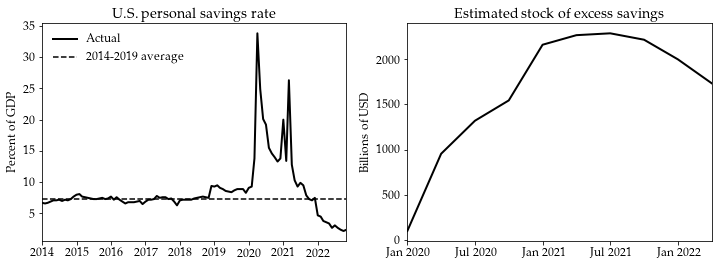

In [6]:
fig, ax1 = plt.subplots(1,2,figsize=(12,4))
ax1[0].plot(df['savings_rate'], linewidth = 2, label='Actual', color='k')
ax1[0].axhline(mean, linestyle='--', label='2014-2019 average', color='k')
ax1[0].tick_params(axis='both', which='major', labelsize=12) 
ax1[0].set_xlim(date(2014, 1, 1),date(2022, 11, 1))
ax1[0].set_title('U.S. personal savings rate')
ax1[0].legend(framealpha=0)
ax1[0].set_ylabel('Percent of GDP')
    
ax1[1].plot(df2['excess_savings'], linewidth = 2, color='k')
ax1[1].tick_params(axis='both', which='major') 
ax1[1].set_xlim('Jan 2020','Apr 2022')
ax1[1].set_xticks(['Jan 2020','Jul 2020', 'Jan 2021', 'Jul 2021', 'Jan 2022'])
ax1[1].set_title('Estimated stock of excess savings')
ax1[1].set_ylabel('Billions of USD')

#plt.tight_layout();
#fig.delaxes(ax1[0])
plt.savefig(f'Figure1.pdf', transparent=True  );

Report data

In [7]:
df2['excess_savings']

date
Jan 2020      99.266
Apr 2020     954.020
Jul 2020    1319.318
Oct 2020    1544.126
Jan 2021    2160.373
Apr 2021    2266.215
Jul 2021    2286.653
Oct 2021    2215.899
Jan 2022    1998.736
Apr 2022    1734.060
Name: excess_savings, dtype: float64